## Project Title:Data Visualization of Bird Strikes between 2000 – 2011 

#### PREPROCESSING AND EDA

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot

# Initialize Plotly offline mode
init_notebook_mode(connected=True)

In [2]:
df=pd.read_excel(r"C:\Users\gopik\Downloads\Bird Strikes data.xlsx")

In [3]:
df

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,30736,1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,2001-07-25,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,2001-09-14,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,2003-06-23,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50.0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25553,321151,Airplane,REDDING MUNICIPAL,> 1000 ft,EMB-120,1,1,NaN,2011-12-30,No damage,...,False,DUCK? NO DMG REPTD.,Large,Overcast,Unknown bird - large,N,0,1500.0,0,No
25554,319677,Airplane,ORLANDO INTL,< 1000 ft,A-321,1,1,NaN,2011-12-30,No damage,...,False,NaN,Small,Some Cloud,Tree swallow,Y,0,0.0,0,No
25555,319680,NaN,NaN,NaN,EC-135,NaN,1,NaN,NaT,No damage,...,False,STRUCK BIRD ON RT FRONT DURING T/O. BIRD REPTD...,NaN,No Cloud,Unknown bird - small,NaN,0,NaN,0,NaN
25556,319679,Airplane,DETROIT METRO WAYNE COUNTY ARPT,< 1000 ft,B-757-200,1,1,NaN,2011-12-31,No damage,...,False,PILOTS REPORT STRIKING UNKNOWN BIRD ON RWY 21L...,Medium,Some Cloud,Unknown bird - medium,Y,0,0.0,0,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Record ID                                25558 non-null  int64         
 1   Aircraft: Type                           25429 non-null  object        
 2   Airport: Name                            25429 non-null  object        
 3   Altitude bin                             25429 non-null  object        
 4   Aircraft: Make/Model                     25558 non-null  object        
 5   Wildlife: Number struck                  25429 non-null  object        
 6   Wildlife: Number Struck Actual           25558 non-null  int64         
 7   Effect: Impact to flight                 2078 non-null   object        
 8   FlightDate                               25429 non-null  datetime64[ns]
 9   Effect: Indicated Damage               

In [5]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [6]:
# dropping the columns that has more than 50% missing values
#df=df.dropna(thresh=len(df)*0.5,axis=1)

In [7]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

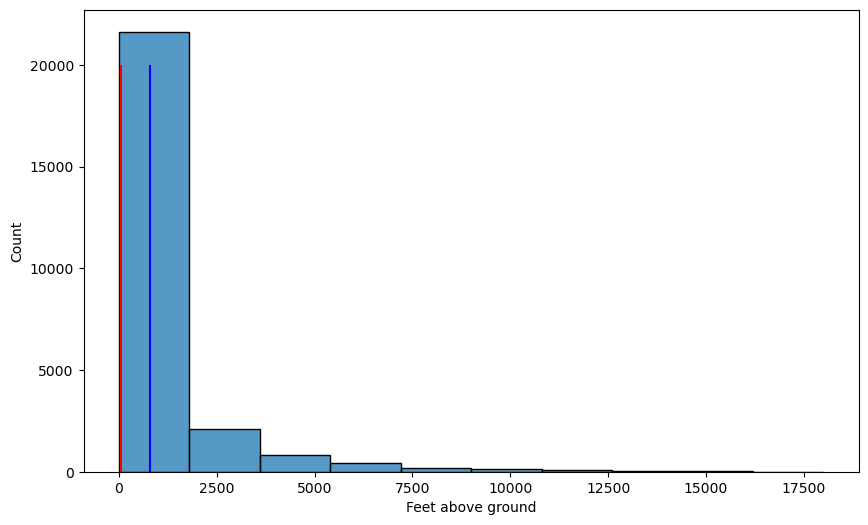

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data=df,x="Feet above ground",bins=10)
plt.vlines(df['Feet above ground'].mean(),ymin=0,ymax=20000,colors='blue',label='mean')
plt.vlines(df['Feet above ground'].median(),ymin=0,ymax=20000,colors='red',label='median')
plt.show()

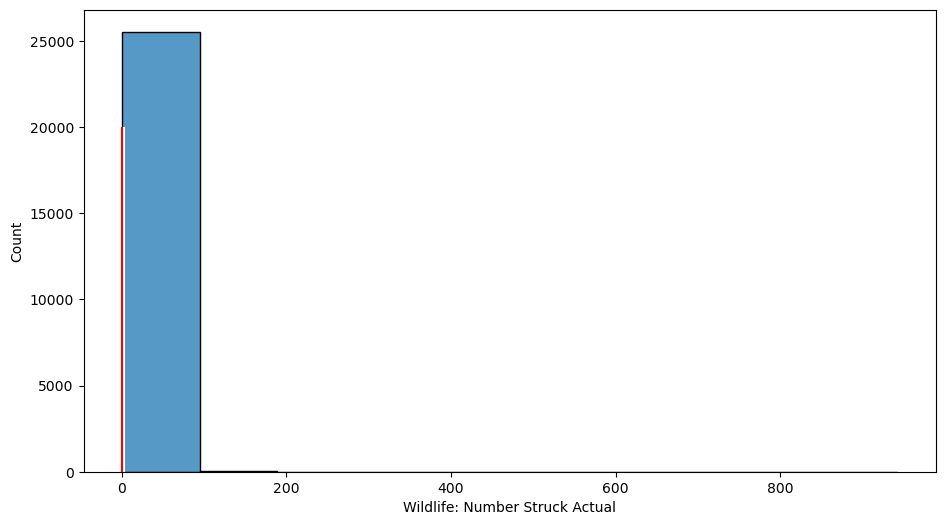

In [10]:
plt.figure(figsize=(11,6))
sns.histplot(data=df,x="Wildlife: Number Struck Actual",bins=10)
plt.vlines(df['Wildlife: Number Struck Actual'].mean(),ymin=0,ymax=20000,colors='white',label='mean')
plt.vlines(df['Wildlife: Number Struck Actual'].median(),ymin=0,ymax=20000,colors='red',label='median')
plt.show()

In [11]:
# since mean and median is very close we can choose mean as central tendancy
df['Wildlife: Number Struck Actual']=df['Wildlife: Number Struck Actual'].fillna(df['Wildlife: Number Struck Actual'].mean())

In [12]:
# imputing categorical columns with mode
df['Aircraft: Type'] = df['Aircraft: Type'].fillna(df['Aircraft: Type'].mode()[0])

In [13]:
# imputing categorical columns with mode
df['Aircraft: Airline/Operator'] = df['Aircraft: Airline/Operator'].fillna(df['Aircraft: Airline/Operator'].mode()[0])

In [14]:
df.isnull().sum()

Record ID                                      0
Aircraft: Type                                 0
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                     0
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [15]:
# filling the categorical data by imputing with mode
# filling numerical columns using KNNImputer

from sklearn.impute import KNNImputer

num_cols=df.select_dtypes(include=['float64','int64']).columns
cat_cols=df.select_dtypes(include=['object']).columns

#imputing categorical columns
df[cat_cols]=df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

#imputing numerical columns
imputer=KNNImputer(n_neighbors=5)
df[num_cols]=imputer.fit_transform(df[num_cols])

print(df.isnull().sum())

Record ID                                    0
Aircraft: Type                               0
Airport: Name                                0
Altitude bin                                 0
Aircraft: Make/Model                         0
Wildlife: Number struck                      0
Wildlife: Number Struck Actual               0
Effect: Impact to flight                     0
FlightDate                                 129
Effect: Indicated Damage                     0
Aircraft: Number of engines?                 0
Aircraft: Airline/Operator                   0
Origin State                                 0
When: Phase of flight                        0
Conditions: Precipitation                    0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Remarks                                      0
Wildlife: Size                               0
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned 

In [16]:
df['FlightDate']

0       2000-11-23
1       2001-07-25
2       2001-09-14
3       2002-09-05
4       2003-06-23
           ...    
25553   2011-12-30
25554   2011-12-30
25555          NaT
25556   2011-12-31
25557   2011-12-31
Name: FlightDate, Length: 25558, dtype: datetime64[ns]

In [17]:
df['FlightDate']=df['FlightDate'].fillna(method='ffill')

### VISUALIZATION

##### Visuals Depicting the Number of Bird Strikes 

In [18]:
import plotly.express as px

In [19]:
bird_strike=df['FlightDate'].dt.year.value_counts().reset_index()
bird_strike

,FlightDate,count
0,2009,3262
1,2010,3149
2,2011,2992
3,2007,2308
4,2008,2269
5,2006,2161
6,2005,1856
7,2004,1696
8,2002,1688
9,2003,1570


In [20]:
fig = px.bar(bird_strike, x='FlightDate', y='count', 
             color=bird_strike['count'],   
             title='Bird Strikes Over Years')


fig.update_layout(
    xaxis_title='Flight Year',
    yaxis_title='Number Of Bird Strikes',
    plot_bgcolor='black',  
    title_font=dict(size=20, family='Arial'),  
    title_x=0.5, 
    title_y=0.95,
    template='plotly_dark'
)
fig.update_traces(text=bird_strike['count'],texttemplate='%{text}',textposition='outside')


iplot(fig)

### Yearly Analysis & Bird Strikes in the US

In [21]:
import plotly.graph_objects as go

In [22]:
fig=px.scatter(bird_strike,x='FlightDate',y='count',title='Yearly Analysis of Bird Strike in US')
fig.add_trace(px.line(bird_strike,x='FlightDate',y='count').data[0])
fig.update_layout(xaxis_title='Flight Year',yaxis_title='Number Of Bird Strikes',plot_bgcolor='black',
            )

iplot(fig)

### Top 10 US Airlines in terms of having encountered bird strikes

In [23]:
top_airlines=df['Aircraft: Airline/Operator'].value_counts().head(10).reset_index()
top_airlines

,Aircraft: Airline/Operator,count
0,SOUTHWEST AIRLINES,4757
1,BUSINESS,3074
2,AMERICAN AIRLINES,2058
3,DELTA AIR LINES,1349
4,AMERICAN EAGLE AIRLINES,932
5,SKYWEST AIRLINES,891
6,US AIRWAYS*,797
7,JETBLUE AIRWAYS,708
8,UPS AIRLINES,590
9,US AIRWAYS,540


In [24]:
plt.figure(figsize=(11,6))
fig = px.bar(top_airlines, y='Aircraft: Airline/Operator', x='count', 
             color=top_airlines['count'], orientation='h',  
             title='Top 10 US Airlines in Terms Of Bird Strikes')


fig.update_layout(
    yaxis_title='Aircraft: Airline/Operator',
    xaxis_title='Number of Bird Strikes ',
    plot_bgcolor='black',  
    title_font=dict(size=20, family='Arial'),  
    title_x=0.5, 
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False)
)


fig.update_traces(marker_line_color='white')



iplot(fig)

<Figure size 1100x600 with 0 Axes>

### Airports with most incidents of bird strikes – Top 50

In [25]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [26]:
airport=df['Airport: Name'].value_counts().head(50).reset_index()
airport

,Airport: Name,count
0,DALLAS/FORT WORTH INTL ARPT,932
1,SACRAMENTO INTL,676
2,SALT LAKE CITY INTL,479
3,DENVER INTL AIRPORT,476
4,KANSAS CITY INTL,452
5,PHILADELPHIA INTL,442
6,ORLANDO INTL,408
7,BALTIMORE WASH INTL,401
8,LOUISVILLE INTL ARPT,395
9,JOHN F KENNEDY INTL,390


In [27]:
plt.figure(figsize=(11,6))
fig = px.bar(airport, y='Airport: Name',x='count', 
             color=airport['count'], orientation='h',  
             title='Top 50 Airports with Most Incidents of Bird Strikes')


fig.update_layout(
    yaxis_title='Airport: Name',
    xaxis_title='Number of Bird Strikes ',
    plot_bgcolor='black',  
    title_font=dict(size=20, family='Arial'),  
    title_x=0.5, 
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False)
)


fig.update_traces(marker_line_color='white')



iplot(fig)

<Figure size 1100x600 with 0 Axes>

### Yearly Cost Incurred due to Bird Strikes:

In [28]:
df['Year']=df['FlightDate'].dt.year

In [29]:
yearly_cost=df.groupby('Year')['Cost: Total $'].sum().reset_index()
yearly_cost

,Year,Cost: Total $
0,2000,5625496.0
1,2001,23259457.0
2,2002,9046405.0
3,2003,13176787.0
4,2004,8136108.0
5,2005,7026904.0
6,2006,18309903.0
7,2007,10826204.0
8,2008,12011035.0
9,2009,9564854.0


In [30]:
plt.figure(figsize=(11,6))
fig = px.bar(yearly_cost, x='Year',y='Cost: Total $', 
             color_discrete_sequence=['orange'],  
             title='Yearly Cost Incurred due to Bird Strikes')
fig.update_layout(
    yaxis_title='Total Yearly Cost',
    xaxis_title='Year',
    plot_bgcolor='black',
    title_font=dict(size=20, family='Arial'),
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False),
    template='plotly_dark'
)
fig.update_traces(text=yearly_cost['Cost: Total $'],texttemplate='%{text}$',textposition='outside')

iplot(fig)

<Figure size 1100x600 with 0 Axes>

### When do most bird strikes occur?

In [31]:
df['When: Phase of flight']

0               Climb
1        Landing Roll
2            Approach
3               Climb
4            Approach
             ...     
25553        Approach
25554    Landing Roll
25555        Approach
25556    Landing Roll
25557    Take-off run
Name: When: Phase of flight, Length: 25558, dtype: object

In [32]:
phase=df['When: Phase of flight'].value_counts().reset_index()
phase

,When: Phase of flight,count
0,Approach,10511
1,Landing Roll,5047
2,Take-off run,4711
3,Climb,4429
4,Descent,776
5,Taxi,74
6,Parked,10


In [33]:
fig = px.pie(phase, names='When: Phase of flight', values='count', title='Distribution of Flight Phases')
fig.update_layout(
    paper_bgcolor='black',
    title_font=dict(size=20, family='Arial',color='white'),
    title_x=0.5,
    title_y=0.95,
    template='plotly_dark',
   
)
fig.update_traces(marker_line_color='white')

iplot(fig)

### Altitude of aeroplanes at the time of strike

In [34]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year'],
      dtype='object')

In [35]:
df['Feet above ground']

0        1500.0
1           0.0
2          50.0
3          50.0
4          50.0
          ...  
25553    1500.0
25554       0.0
25555      40.0
25556       0.0
25557       0.0
Name: Feet above ground, Length: 25558, dtype: float64

In [36]:
df['Altitude Category']=np.where(df['Feet above ground']<1000,'<1000 ft','>1000 ft')

In [37]:
df['Altitude Category']

0        >1000 ft
1        <1000 ft
2        <1000 ft
3        <1000 ft
4        <1000 ft
           ...   
25553    >1000 ft
25554    <1000 ft
25555    <1000 ft
25556    <1000 ft
25557    <1000 ft
Name: Altitude Category, Length: 25558, dtype: object

In [38]:
altitude_count=df['Altitude Category'].value_counts().reset_index()
altitude_count

,Altitude Category,count
0,<1000 ft,19813
1,>1000 ft,5745


In [39]:
fig=px.pie(altitude_count,names='Altitude Category',values='count',title='Altitude of Airplanes at the Time Of Bird Strike')
fig.update_layout(
    paper_bgcolor='black',
    title_font=dict(size=20, family='Arial',color='white'),
    title_x=0.5,
    title_y=0.95,
    template='plotly_dark',
    legend=dict(orientation='h',x=0.5,y=-0.1)
)
fig.update_traces(marker_line_color='white')

iplot(fig)

### Phase of flight at the time of the strike.

In [40]:
phase=df['When: Phase of flight'].value_counts(normalize=True)*100
phase_df=phase.reset_index()
phase_df

,When: Phase of flight,proportion
0,Approach,41.126066
1,Landing Roll,19.747242
2,Take-off run,18.432585
3,Climb,17.329212
4,Descent,3.036231
5,Taxi,0.289538
6,Parked,0.039127


In [41]:
fig=px.bar(phase_df,x='When: Phase of flight',y='proportion',  
             title='Percentage of Occurrences of Airplane Phases at Time of Bird Strike')
fig.update_layout(
    yaxis_title='Percentage',
    xaxis_title='Phases',
    plot_bgcolor='black',
    title_font=dict(size=20, family='Arial'),
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False),
    template='plotly_dark'
)
fig.update_traces(text=phase_df['proportion'].round(2),texttemplate='%{text}%',textposition='outside')


iplot(fig)

### Average Altitude of the aeroplanes in different phases at the time of strike

In [42]:
phase_avg_altitude=df.groupby('When: Phase of flight')['Feet above ground'].mean().sort_values().reset_index()
phase_avg_altitude

,When: Phase of flight,Feet above ground
0,Landing Roll,0.000000
1,Parked,0.000000
2,Taxi,0.000000
3,Take-off run,0.101040
4,Approach,999.923071
5,Climb,1199.654324
6,Descent,5933.960052


In [43]:
fig=px.bar(phase_avg_altitude,x='When: Phase of flight',y='Feet above ground',  
             title='Average Altitude in Different phases at Time of Bird Strike')
fig.update_layout(
    yaxis_title='Feet above ground',
    xaxis_title='Phase of flight',
    plot_bgcolor='black',
    title_font=dict(size=20, family='Arial'),
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False),
    template='plotly_dark'
)
fig.update_traces(text=phase_avg_altitude['Feet above ground'].round(2),texttemplate='%{text}',textposition='outside')


iplot(fig)

### Effect of Bird Strikes & Impact on Flight

In [44]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year', 'Altitude Category'],
      dtype='object')

In [45]:
impact=df['Effect: Impact to flight'].value_counts().reset_index()
impact

,Effect: Impact to flight,count
0,Precautionary Landing,24601
1,Aborted Take-off,479
2,Other,390
3,Engine Shut Down,88


In [46]:
fig=px.histogram(impact,x='Effect: Impact to flight',y='count',  
             title='Effect of Bird Strike on Flight')
fig.update_layout(
    yaxis_title='Number of Bird Strikes',
    xaxis_title='Impact of Flight',
    plot_bgcolor='black',
    title_font=dict(size=20, family='Arial'),
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False),
    template='plotly_dark'
)
fig.update_traces(text=impact['count'],texttemplate='%{text}',textposition='outside')


iplot(fig)

### Were Pilots Informed? & Prior Warning and Effect of Strike Relation

In [47]:
df.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'Year', 'Altitude Category'],
      dtype='object')

In [48]:
pilot_warning_impact=df.groupby(['Pilot warned of birds or wildlife?','Effect: Impact to flight']).size().reset_index()

In [49]:
pilot_warning_impact.rename(columns={0: 'count'}, inplace=True)
pilot_warning_impact

,Pilot warned of birds or wildlife?,Effect: Impact to flight,count
0,N,Aborted Take-off,250
1,N,Engine Shut Down,52
2,N,Other,248
3,N,Precautionary Landing,14146
4,Y,Aborted Take-off,229
5,Y,Engine Shut Down,36
6,Y,Other,142
7,Y,Precautionary Landing,10455


In [50]:
fig=px.bar(pilot_warning_impact,x='Pilot warned of birds or wildlife?',y='count',  
             title='Effect of Bird Strike based on Prior Warning',
          color='Effect: Impact to flight',barmode='group')
fig.update_layout(
    yaxis_title='Number of Bird Strikes',
    xaxis_title='Pilot warned of birds or wildlife?',
    plot_bgcolor='black',
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False),
    template='plotly_dark'
)
#fig.update_traces(text=pilot_warning_impact['count'],texttemplate='%{text}',textposition='outside')

iplot(fig)

### Top 10 Wildlife Species in Bird Strike

In [51]:
top_species=df['Wildlife: Species'].value_counts().head(10).reset_index()

In [52]:
top_species

,Wildlife: Species,count
0,Unknown bird - small,10505
1,Unknown bird - medium,4318
2,Mourning dove,898
3,European starling,885
4,Unknown bird - large,797
5,Rock pigeon,596
6,Barn swallow,579
7,Killdeer,470
8,American kestrel,444
9,Red-tailed hawk,412


In [53]:
fig=px.bar(top_species,y='Wildlife: Species',x='count',  
             title='Top 10 Wildlife Species in Bird Strike',
          color='count',color_continuous_scale='viridis')
fig.update_layout(
    xaxis_title='Number of Bird Strikes',
    yaxis_title='Wildlife: Species',
    plot_bgcolor='black',
    title_x=0.5,
    title_y=0.95,
    yaxis=dict(showgrid=False),
    xaxis=dict(showgrid=False),
    template='plotly_dark'
)
fig.update_traces(text=top_species['count'],texttemplate='%{text}',textposition='outside')

iplot(fig)

### Top 10 States with Most Bird Strikes

In [54]:
top_states=df['Origin State'].value_counts().head(10).reset_index()
top_states

,Origin State,count
0,California,2969
1,Texas,2453
2,Florida,2055
3,New York,1319
4,Illinois,1008
5,Pennsylvania,986
6,Missouri,960
7,Kentucky,812
8,Ohio,778
9,Hawaii,729


In [55]:
fig=px.bar(top_states,y='Origin State',x='count',
          title='Top 10 States with Most Bird Strikes',
          color='count')
fig.update_layout(yaxis_title='Origin State',
                 xaxis_title='Number of Bird Strikes',
                 plot_bgcolor='black',
                 template='plotly_dark',
                 yaxis=dict(showgrid=False))
fig.update_traces(text=top_states['count'],texttemplate='%{text}',textposition='outside')

iplot(fig)

### Bird Strike Incident due to Weather Conditions

In [56]:
weather=df['Conditions: Sky'].value_counts().reset_index()
weather

,Conditions: Sky,count
0,No Cloud,12642
1,Some Cloud,8706
2,Overcast,4210


In [57]:
total_strikes=weather['count'].sum()
weather['Percentage']=(weather['count']/total_strikes)*100

In [58]:
weather

,Conditions: Sky,count,Percentage
0,No Cloud,12642,49.463964
1,Some Cloud,8706,34.063698
2,Overcast,4210,16.472337


In [59]:
fig=px.bar(weather,x='Conditions: Sky',y='Percentage',
          title='Bird Strike Incident due to Weather Conditions',
          color='Percentage')
fig.update_layout(xaxis_title=' Sky Conditions',
                 yaxis_title='Percentage of Bird Strikes',
                 plot_bgcolor='black',
                 template='plotly_dark',
                 yaxis=dict(showgrid=False))
fig.update_traces(text=weather['Percentage'].round(2),texttemplate='%{text}%',textposition='outside')

iplot(fig)

### Overall Percentage of Bird Strike by Weather Conditions

In [60]:
overall_weather=df.groupby(['Year','Conditions: Sky']).size().unstack().fillna(0)

In [61]:
weather_percentage=overall_weather.div(overall_weather.sum(axis=1),axis=0)*100
weather_percentage=weather_percentage.reset_index()
weather_percentage

Conditions: Sky,Year,No Cloud,Overcast,Some Cloud
0,2000,50.182349,18.161926,31.655726
1,2001,49.110032,16.585761,34.304207
2,2002,48.459716,17.061611,34.478673
3,2003,49.872611,17.070064,33.057325
4,2004,47.110849,18.219340,34.669811
5,2005,49.515086,17.241379,33.243534
6,2006,50.254512,17.029153,32.716335
7,2007,51.386482,14.558059,34.055459
8,2008,50.771265,15.469370,33.759365
9,2009,46.443899,16.983446,36.572655


In [62]:
melt_weather_percentage = pd.melt(weather_percentage, id_vars='Year',
                                  var_name='Weather Condition',
                                  value_name='Percentage')

In [63]:
melt_weather_percentage

,Year,Weather Condition,Percentage
0,2000,No Cloud,50.182349
1,2001,No Cloud,49.110032
2,2002,No Cloud,48.459716
3,2003,No Cloud,49.872611
4,2004,No Cloud,47.110849
5,2005,No Cloud,49.515086
6,2006,No Cloud,50.254512
7,2007,No Cloud,51.386482
8,2008,No Cloud,50.771265
9,2009,No Cloud,46.443899


In [64]:
fig=px.bar(melt_weather_percentage,x='Year',y='Percentage',
          title='Overall Percentage of Bird Strike by Weather Conditions',
          color='Weather Condition',
          barmode='group')
fig.update_layout(xaxis_title=' Year',
                 yaxis_title='Percentage of Bird Strikes',
                 plot_bgcolor='black',
                 template='plotly_dark',
                 yaxis=dict(showgrid=False))
fig.update_traces(text=melt_weather_percentage['Percentage'].round(2),texttemplate='%{text}%',textposition='outside')

iplot(fig)